# **Project: To Investigate the Factors Assosciated with a Patient\'s show up for Medical Appointment**



## **Introduction**
This project investigates the variables that determines whether patients show up for their appointments as scheduled or not. The dataset consists of information of medical appointments as scheduled by males and females of different locations in Brazil. It also highlighs the ages of these patients as well as the ailments associated with their cause of seeking medical attention.
The analysis centres on the investigation of a dependent variable against certain independent variables and answers the following questions. Number of patients that showed up for their appointments as well as their age categories were investigated,likewise, the appointment show up based on patient geneder and whehter Alcoholism contributed to the failure of the patient no-show for their appointment. Lastly, the proportion of age categories with specific ailment were investigated.

### **Questions**
> - What percentage of the patient did not show up for their appointment and what age category showed up most.
> - What Gender missed the appointment most, is Alcoholism a contributor to patients failure to show up for their appointment.
> - Does health care welfare programs availability for patients affects their show-up.
> - Which age category had the highest proportion of diabetes, handicap and hypertension


In [1]:
#Importing all the requisite packages used in the analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline



In [2]:
#Loading the data for inspection
df_appointment = pd.read_csv('noshowappointments_16.csv')
df_appointment.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [3]:
#Displays the number of columns and rows of the dataset in a vector form
display(df_appointment.shape)

(110527, 14)

In [4]:
#Displays the dataset characteristics
df_appointment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#Displays the descriptive statisitcs of the dataset
df_appointment.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
#checks for duplicates in the dataset
sum(df_appointment.duplicated())


0

In [7]:
#checks for null values in the dataset
df_appointment.isna().any(axis=1).sum()

0

In [8]:
#Counts the number of unique values of the dataset
df_appointment.nunique()


PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
df_appointment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


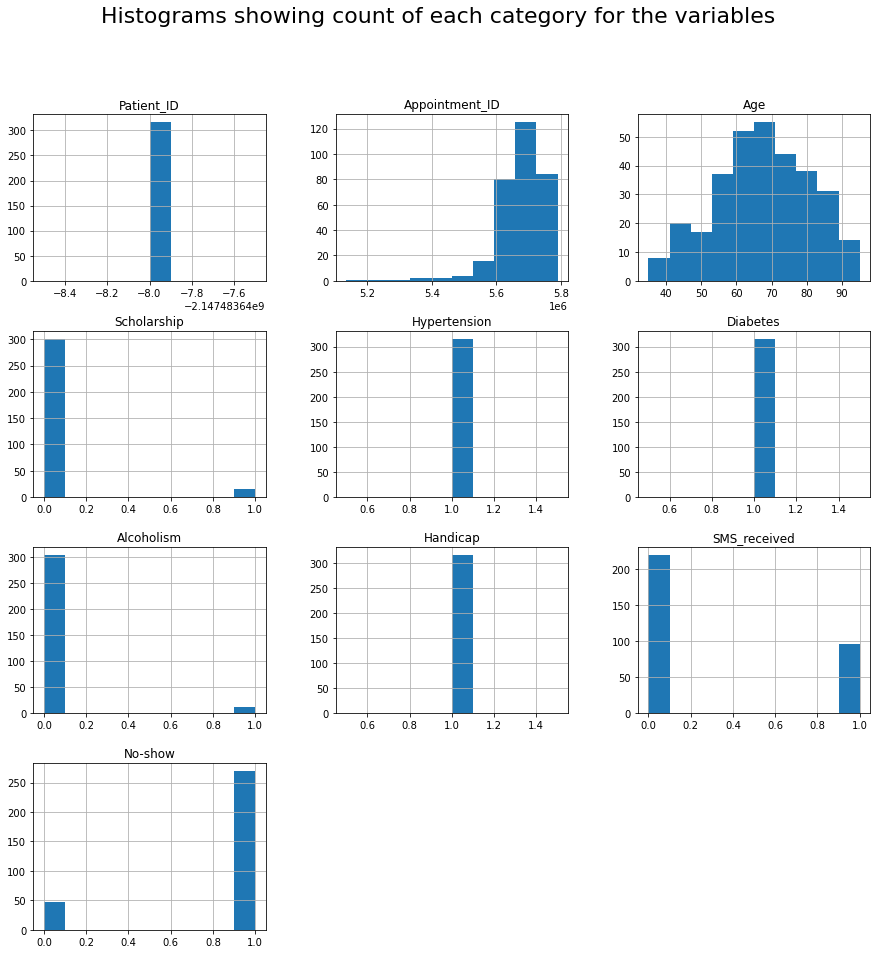

In [34]:
#Histogram to show distribution of data for each feature
df_appointment.hist(figsize=(15,15))
plt.suptitle('Histograms showing count of each category for the variables', fontsize=22);

## **Description of the dataset**
Based on the execution of the above codes, the dataset is composed of 11057 rows and 14 columns with each columns appropriately outlined, however with some misplellings. The datatype of the entities were found to be inconsistent with some column headings, which will later be changed accordingingly. No duplicate rows or columns was observed and the numbers of the unique elements on each rows also observed with some columns having two(2) unique numbers to depicts they are boolean data. An unrealistic value(-1) is also present in the age data with the percentage of older patients more than the younger ones. Number of patient with diabetes and Hypertension are considerably high while percentage of patient with Alcoholism and handicap are extremely low among the patients. More than 20% received SMS and the entire dataset is free of any missing data. Lastly, the dependent variable(No-show) has a data type string, which might make it difficult to answering questions and the variable would be reassigned with appropriate values type, aloogside other requisite value type reassignment in the data set. 


## **Data Cleaning**
The following cells outlines the data cleaning operations carried out on the dataset with appropriate comments in each cell for easier reference.

In [11]:
#Checking columns for possible corrections
df_appointment.columns



Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [12]:

#Renaming the columnIDs
column_label = ['Patient_ID','Appointment_ID','Gender','Schedule_date','Appointment_date','Age','Neighbourhood','Scholarship','Hypertension','Diabetes','Alcoholism','Handicap','SMS_received', 'No-show']

df_appointment.columns = column_label

df_appointment.head(2)

,Patient_ID,Appointment_ID,Gender,Schedule_date,Appointment_date,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [13]:
#Changing datatype
for item in ['Patient_ID','Appointment_ID']:
    df_appointment[item] =df_appointment[item].astype(np.int)

    
for item in ['Scholarship','Hypertension','Diabetes','Alcoholism','Handicap','SMS_received']:
    df_appointment[item] = df_appointment[item].astype(np.int)


#Change the  datatype of Schedule day and appointment day from string to datetime
import datetime as dt

df_appointment['Schedule_date'] = pd.to_datetime(df_appointment['Schedule_date'])
df_appointment['Appointment_date'] = pd.to_datetime(df_appointment['Appointment_date'])
   


df_appointment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   Patient_ID        110527 non-null  int32              
 1   Appointment_ID    110527 non-null  int32              
 2   Gender            110527 non-null  object             
 3   Schedule_date     110527 non-null  datetime64[ns, UTC]
 4   Appointment_date  110527 non-null  datetime64[ns, UTC]
 5   Age               110527 non-null  int64              
 6   Neighbourhood     110527 non-null  object             
 7   Scholarship       110527 non-null  int32              
 8   Hypertension      110527 non-null  int32              
 9   Diabetes          110527 non-null  int32              
 10  Alcoholism        110527 non-null  int32              
 11  Handicap          110527 non-null  int32              
 12  SMS_received      110527 non-null  int32    

In [14]:
#Getting the weekdays and insert into the data fram (adding 2 columns.)
Schedule_Day = df_appointment.Schedule_date.dt.day_name()
df_appointment.insert(5,'Schedule_Day', Schedule_Day)

Appointment_day = df_appointment.Appointment_date.dt.day_name()
df_appointment.insert(6,'Appointment_day', Appointment_day)

df_appointment.head()

,Patient_ID,Appointment_ID,Gender,Schedule_date,Appointment_date,Schedule_Day,Appointment_day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,-2147483648,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,Friday,Friday,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,-2147483648,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,Friday,Friday,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,-2147483648,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,Friday,Friday,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,-2147483648,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,Friday,Friday,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,-2147483648,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,Friday,Friday,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
#Reassigning variable values for No-show to ease exploratory analysis.
## 1 and 0 will be used to replace the values for No(patient showed up) and Yes(Patient did not show) respectively.

val = {'No': 1, 'Yes': 0}

df_appointment['No-show'] = df_appointment['No-show'].map(val).fillna(df_appointment['No-show']).astype(int)


df_appointment

,Patient_ID,Appointment_ID,Gender,Schedule_date,Appointment_date,Schedule_Day,Appointment_day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,-2147483648,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,Friday,Friday,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,-2147483648,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,Friday,Friday,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,-2147483648,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,Friday,Friday,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,-2147483648,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,Friday,Friday,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,-2147483648,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,Friday,Friday,56,JARDIM DA PENHA,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,-2147483648,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,Tuesday,Tuesday,56,MARIA ORTIZ,0,0,0,0,0,1,1
110523,-2147483648,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,Tuesday,Tuesday,51,MARIA ORTIZ,0,0,0,0,0,1,1
110524,-2147483648,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,Wednesday,Tuesday,21,MARIA ORTIZ,0,0,0,0,0,1,1
110525,-2147483648,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,Wednesday,Tuesday,38,MARIA ORTIZ,0,0,0,0,0,1,1


In [16]:
df_appointment.head()

,Patient_ID,Appointment_ID,Gender,Schedule_date,Appointment_date,Schedule_Day,Appointment_day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,-2147483648,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,Friday,Friday,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,-2147483648,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,Friday,Friday,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,-2147483648,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,Friday,Friday,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,-2147483648,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,Friday,Friday,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,-2147483648,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,Friday,Friday,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [17]:
#Removing the unrealistic age of -1
df_appointment['Age'].value_counts()   #this initial code shows that the total number of the unrealistic age is 1

df_appointment.drop(df_appointment.loc[df_appointment['Age']== -1].index, inplace=True)

df_appointment['Age'].value_counts()    #this confirms the unrealistic age has been removed

df_appointment.nunique() 

Patient_ID             161
Appointment_ID      110526
Gender                   2
Schedule_date       103548
Appointment_date        27
Schedule_Day             6
Appointment_day          6
Age                    103
Neighbourhood           81
Scholarship              2
Hypertension             2
Diabetes                 2
Alcoholism               2
Handicap                 5
SMS_received             2
No-show                  2
dtype: int64

The number of unique values of Age is now reduced to 103 from 104

Adults      0.466804
Children    0.210421
Youth       0.202432
Senior      0.120343
Name: Age_Category, dtype: float64


C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


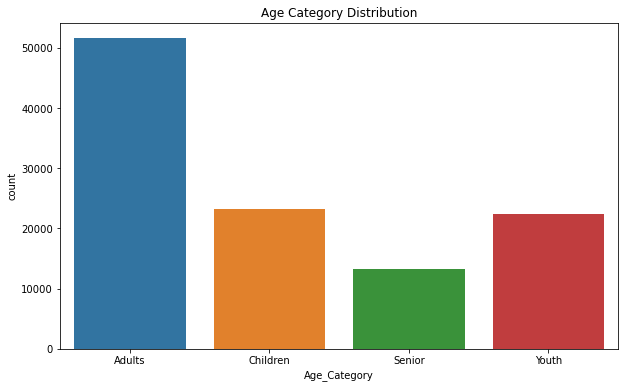

In [18]:
#getting age category and inserting the column in the dataset

def Age_Category(col):
    if (col >= 0) & (col <=14):
        return 'Children'
    elif (col > 14) & (col <=30):
        return 'Youth'
    elif (col > 30) & (col <=65):
        return 'Adults'
    else:
        return 'Senior'

df_appointment['Age_Category'] = df_appointment['Age'].apply(Age_Category)
df_appointment.head(10)

df_appointment['Age_Category'] = df_appointment['Age'].apply(Age_Category)
print(df_appointment['Age_Category'].value_counts(normalize = True))

plt.figure(figsize=(10,6))
sns.countplot(df_appointment['Age_Category'])
plt.title('Age Category Distribution')
plt.show()

# df_appointment['Age_Category']=df_appointment.insert(8,'Age_Category', Age_Category) 


In [19]:
#Reordering the age category column
position =8

column_to_reorder = df_appointment.pop('Age_Category')

df_appointment.insert(position, 'Age_Category', column_to_reorder)

df_appointment

,Patient_ID,Appointment_ID,Gender,Schedule_date,Appointment_date,Schedule_Day,Appointment_day,Age,Age_Category,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,-2147483648,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,Friday,Friday,62,Adults,JARDIM DA PENHA,0,1,0,0,0,0,1
1,-2147483648,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,Friday,Friday,56,Adults,JARDIM DA PENHA,0,0,0,0,0,0,1
2,-2147483648,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,Friday,Friday,62,Adults,MATA DA PRAIA,0,0,0,0,0,0,1
3,-2147483648,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,Friday,Friday,8,Children,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,-2147483648,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,Friday,Friday,56,Adults,JARDIM DA PENHA,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,-2147483648,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,Tuesday,Tuesday,56,Adults,MARIA ORTIZ,0,0,0,0,0,1,1
110523,-2147483648,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,Tuesday,Tuesday,51,Adults,MARIA ORTIZ,0,0,0,0,0,1,1
110524,-2147483648,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,Wednesday,Tuesday,21,Youth,MARIA ORTIZ,0,0,0,0,0,1,1
110525,-2147483648,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,Wednesday,Tuesday,38,Adults,MARIA ORTIZ,0,0,0,0,0,1,1


In [33]:
#Dropping the Schedule date, Appointment date and Neighbourhood columns as they are irrelevant to the questions 
df_appointment.drop(['Schedule_date', 'Appointment_date'], axis=1)

,Patient_ID,Appointment_ID,Gender,Schedule_Day,Appointment_day,Age,Age_Category,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
199,-2147483648,5639969,M,Friday,Friday,62,Adults,PARQUE MOSCOSO,0,1,1,0,1,0,1
238,-2147483648,5622841,F,Tuesday,Friday,65,Adults,ARIOVALDO FAVALESSA,0,1,1,0,1,1,1
518,-2147483648,5640945,M,Friday,Friday,79,Senior,BONFIM,0,1,1,0,1,0,1
661,-2147483648,5641392,M,Friday,Friday,59,Adults,SANTO ANDRÉ,0,1,1,0,1,0,1
935,-2147483648,5479047,M,Wednesday,Friday,69,Senior,GRANDE VITÓRIA,0,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108641,-2147483648,5736010,F,Wednesday,Wednesday,57,Adults,SANTO ANTÔNIO,0,1,1,0,1,1,1
109351,-2147483648,5725162,M,Friday,Monday,65,Adults,JESUS DE NAZARETH,0,1,1,0,1,0,1
109512,-2147483648,5778700,F,Monday,Wednesday,53,Adults,DA PENHA,0,1,1,0,1,0,1
109777,-2147483648,5768290,M,Friday,Tuesday,80,Senior,PRAIA DO SUÁ,0,1,1,0,1,1,0


# **Exploratory Data Analysis**


## **Question 1: What percentage of the patient did not show up for their appointment and what age category showed up most**

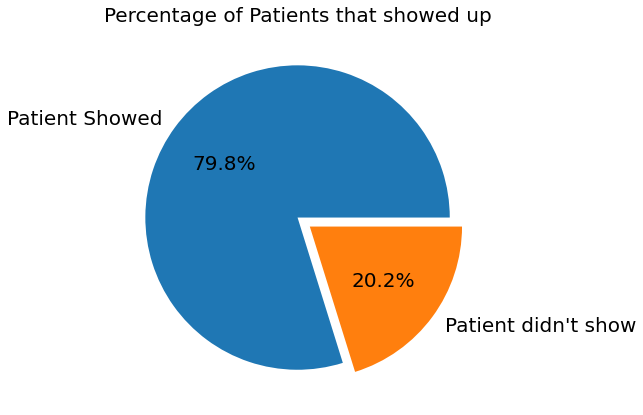

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


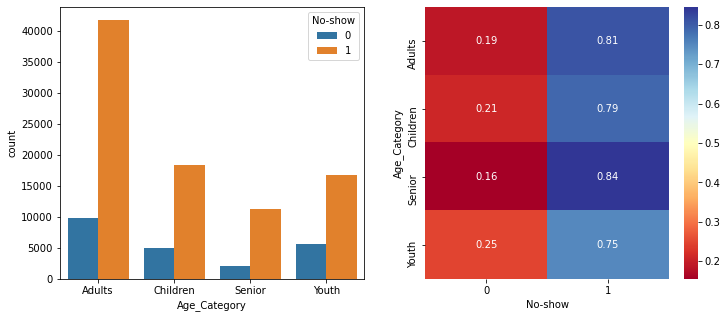

In [21]:
#df_appointment[['No-show']=='No'].counts()

Patient_Showed = df_appointment[df_appointment['No-show']==1].count()['No-show']
Patient_Didnt = df_appointment[df_appointment['No-show']==0].count()['No-show']               

Attendance = [Patient_Showed,Patient_Didnt]
labels =['Patient Showed','Patient didn\'t show']
explode = [0,0.1]


fig = plt.figure(figsize =(10, 7))
plt.pie(Attendance, labels = labels, explode= explode,autopct = '%.1f%%', textprops={'fontsize': 20})
plt.title('Percentage of Patients that showed up', fontsize=20)
plt.show()

#Getting patient show-up by age category
    
plt.figure(figsize=(12,5))

plt.subplot(121)
sns.countplot(df_appointment['Age_Category'],hue = df_appointment['No-show'])

plt.subplot(122)
sns.heatmap(pd.crosstab(df_appointment['Age_Category'], df_appointment['No-show'],normalize='index'),cmap="RdYlBu", annot=True)
plt.show()


In [22]:
print('The Number of patients that showed for their apoointment is:', Patient_Showed)
print('The Number of patients that didn\'t show for their apoointment is:', Patient_Didnt)

The Number of patients that showed for their apoointment is: 88207
The Number of patients that didn't show for their apoointment is: 22319


## **Answer**
**A total of 22,319 patients did not show up for their appointment which constitute 20% of the total number of patients.**
**It can also be inferred that the Adults had more attendance rate of about 79% followed by the Youths with 67% attendance while the Senior category had the least attendance of 9%** 


## **Question 2:What Gender missed the appointment most, is Alcoholism a contributor to patients failure to show up for their appointment.**

In [23]:
#Recall 1 represent patient showed while 0 represent patient didn't show
data = df_appointment.groupby(['Gender','No-show'],as_index=True)['Patient_ID'].count()   #confirms values of the subsequent codes
# print(data)

#"{}%".format(val)

male_patients = df_appointment[df_appointment['Gender'] == 'M'] 
y = male_patients['Patient_ID'].count()       
print('Total number of male patients:', y)


male_patients_absent = male_patients[male_patients['No-show']==0]
x = male_patients_absent['Patient_ID'].count()     
print('Number of male that failed to show up:', x)

#Percentage of male that didn't show up for their appointment
male_No_show = round((x/y) * 100,2)
print('Percentage of male that failed to show up:','{}%'.format(male_No_show))

##female data
female_patients = df_appointment[df_appointment['Gender'] == 'F'] 
a = female_patients['Patient_ID'].count()        #
print('Total number of female patients:', a)


female_patients_absent = female_patients[female_patients['No-show']==0]
b = female_patients_absent['Patient_ID'].count()     
print('Total number of female patient that didn\'t show up for their appointment:', b)

#Percentage of female that didn't show up for their appointment
female_No_show = round((b/a) * 100,2)
print('Percentage of female that failed to show up:', '{}.%'.format(female_No_show))




Total number of male patients: 38687
Number of male that failed to show up: 7725
Percentage of male that failed to show up: 19.97%
Total number of female patients: 71839
Total number of female patient that didn't show up for their appointment: 14594
Percentage of female that failed to show up: 20.31.%


Text(0.5, 1.0, 'Patients by Gender')

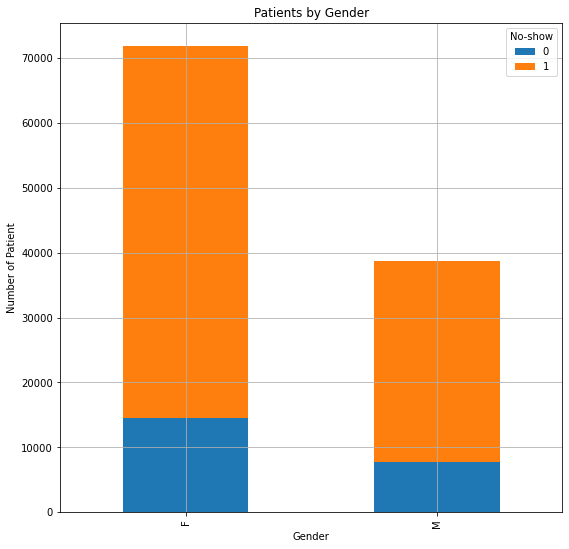

In [24]:
visual_data = df_appointment.groupby(['Gender', 'No-show']).count()
visual_data.head()

visual_data['Patient_ID'].unstack().plot(kind='bar',stacked=True,grid=True, figsize=(9,9))
plt.legend = (["Patient Showed", 'Patient did not show'])  #I dont know why this didn't work
plt.ylabel('Number of Patient')
plt.xlabel('Gender')
plt.title('Patients by Gender')      

In [25]:
#Gender vs Alcoholosim
df_appointment.groupby(['No-show','Alcoholism'], as_index=True)['Patient_ID'].count()


No-show  Alcoholism
0        0             21642
         1               677
1        0             85524
         1              2683
Name: Patient_ID, dtype: int64

In [26]:
all_count = df_appointment['Patient_ID'].count()

Alcohol_show = df_appointment.loc[(df_appointment["Alcoholism"]==1) & (df_appointment["No-show"]==1)]['Patient_ID'].count() 

Alcohol_No_show = df_appointment.loc[(df_appointment["Alcoholism"]==1) & (df_appointment["No-show"]==0)]['Patient_ID'].count()

Alcohol_show_percent = round(Alcohol_show*100 / all_count,2) 
Alcohol_No_show_percent = round(Alcohol_No_show*100 / all_count,2)


Percent_Alcohol_show = (Alcohol_show*100 / (Alcohol_No_show+Alcohol_show)) 

Percent_Alcohol_No_show = (Alcohol_No_show*100 / (Alcohol_No_show+Alcohol_show))
print("Percentage of show ups when patients have alcoholism is {}%, while not show ups is {}%.".format(Alcohol_show_percent,Alcohol_No_show_percent))

Percentage of show ups when patients have alcoholism is 2.43%, while not show ups is 0.61%.


### **Answer**: 
**There is no any significant difference in the appointment show based on gender. Percentage of both males and females that showed up for their appointments is approximately 20%. Likewise, Alcoholism does not affect patient's show up as most of the patients did not miss their appointment and the percentage of show ups when patients have alchoholism is slightly higher than when the patient does not show up.**

## **Question 3:** Does health care Scholarship programs availability for patients affects their show-up.

In [27]:
df_appointment.groupby(['Scholarship','No-show'],as_index=True)['Patient_ID'].count()

Scholarship  No-show
0            0          19741
             1          79924
1            0           2578
             1           8283
Name: Patient_ID, dtype: int64

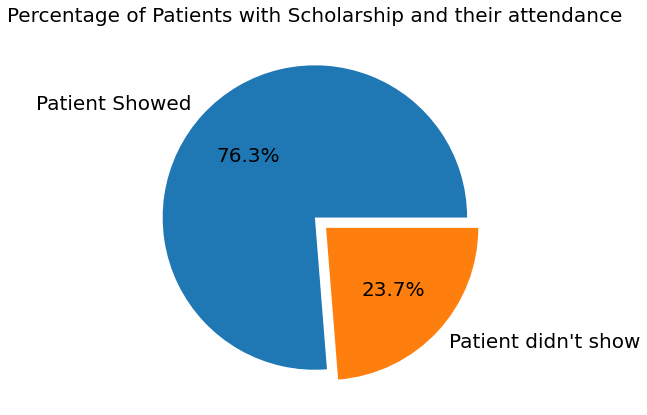

In [28]:
#Patient with Welfare/scholarship and showed for appointment
Scholarship_show = df_appointment.loc[(df_appointment['Scholarship']==1) & (df_appointment['No-show']==1)]['Patient_ID'].count()


#Patient with welfare/scholraship and did not show for appointment
Scholarship_noshow = df_appointment.loc[(df_appointment['Scholarship']==1) & (df_appointment['No-show']==0)]['Patient_ID'].count()

Percentage_Scholarship_show = (Scholarship_show*100)/(Scholarship_show + Scholarship_noshow)
Percentage_Scholarship_noshow = (Scholarship_noshow*100)/(Scholarship_show + Scholarship_noshow)



data_plot = [Percentage_Scholarship_show,Percentage_Scholarship_noshow]
label = ['Patient showed', 'Patient didn\'t']
explode = [0,0.1]

fig = plt.figure(figsize =(10, 7))
plt.pie(data_plot, labels = labels, explode= explode,autopct = '%.1f%%', textprops={'fontsize': 20})
plt.title('Percentage of Patients with Scholarship and their attendance', fontsize=20)
plt.show()



In [29]:
print('Number of Patients with Scholarship that showed up:',Scholarship_show)
print('Number of Patients with Scholarship that didn\'t show up:',Scholarship_noshow)

Number of Patients with Scholarship that showed up: 8283
Number of Patients with Scholarship that didn't show up: 2578


### **Answer**: 
**It can be infeered that availability of scholarship to a patient does not neccesarily mean the patient will show for his/her appointment as approxiamtely 24% of patient with the scholarship did not show for their appointments.**

### **Question:** Which age category had the highest proportion of diabetes, handicap and hypertension

In [30]:
#Calculating the percentage of patient with diabettes,Hypertension,Alcoholism and Handicap
      
Hypertension_count = df_appointment[df_appointment["Hypertension"]==1]['Patient_ID'].count()
Hypertension_percent = round(Hypertension_count*100/all_count,2)
print("Percentage of patients diagnosed with Hypertension is {}%.".format(Hypertension_percent))


Diabetes_count = df_appointment[df_appointment["Diabetes"]==1]['Patient_ID'].count()
Diabetes_percent = round(Diabetes_count*100/all_count,2)
print("Percentage of patients diagnosed with Diabetes is {}%.".format(Diabetes_percent))

Handicap_count = df_appointment[df_appointment["Handicap"]==1]['Patient_ID'].count()
Handicap_percent = round(Handicap_count*100/all_count,2)
print("Percentage of patients diagnosed with Handicap is {}%.".format(Handicap_percent))



Percentage of patients diagnosed with Hypertension is 19.72%.
Percentage of patients diagnosed with Diabetes is 7.19%.
Percentage of patients diagnosed with Handicap is 1.85%.


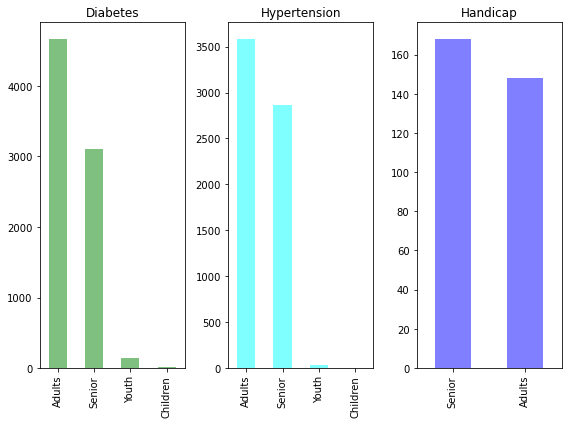

In [31]:


plt.figure(figsize=(8,6))

plt.subplot(131)
df_appointment = df_appointment[df_appointment['Diabetes']==1]
df_appointment['Age_Category'].value_counts().plot(kind = 'bar',alpha=0.5,color='green')
plt.title('Diabetes')


plt.subplot(132)
df_appointment = df_appointment[df_appointment['Hypertension'] == 1]
df_appointment['Age_Category'].value_counts().plot(kind = 'bar',alpha=0.5,color='cyan')
plt.title('Hypertension')

plt.subplot(133)
df_appointment = df_appointment[df_appointment['Handicap'] == 1]
df_appointment['Age_Category'].value_counts().plot(kind = 'bar',alpha=0.5,color='blue')
plt.title('Handicap')

plt.tight_layout()
plt.show()



###  **Answer**
**Hypertension had the highest percentage rate of 19.7% with Adults and Senior age category having a higher proportion while Diabetes had 7.19% followed by Handicap patients with 1.85%. Youth and Children constitute a low proportion of patients with diabetes and Hypertension while the number of handicapped Senior and adults are significantly low.** 

# **Conclusion**
The dataset No-Show Appointment has been investgated with findings outlines with their associated codes. Through the data analysis process of questioning, wrangling and exploratory analysis, the dataset was analysed using python pandas, numpy and matplotlib libraries and the requisite conclusions and communications were outlined. Four questions were investigated and their results were visualized for easier reference.It was observed that 20% of the patient did not show up for their appointment with senior citizens constituting a larger proportion of the patients that did not show. Also, there is no any significant difference in the appointment show based on gender.Likewise, the availability of scholarship to a patient does not neccesarily mean the patient will show for his/her appointment as approxiamtely 24% of patient with the scholarship did not show for their appointments.Lastly, hypertension was found out to be the most prevalent ailment with a considerable number of Adults and Senior age categories having the ailment.However,the analysis fails to utilize all the columns for questioning and more efforts is needed to ensure codes for subsequent projects are written effectively in a more optimized manner.  

## **Refernce**
>- https://stackoverflow.com/questions/
>- Udacity class room
>- Numpy documentation
>- Pandas documentation
>- https://www.skytowner.com/explore